## Polynomial Regression

Polynomial Regression, veri noktalarını bir polinom fonksiyonuyla modellemek için kullanılan bir regresyon tekniğidir. Basit doğrusal regresyonun ötesine geçer ve veri noktalarını daha karmaşık polinomik eğrilerle modellemeyi mümkün kılar.

### Polynomial Regression Nedir?

Polynomial Regression, bir bağımsız değişkenin (x) polinom fonksiyonuyla bağımlı değişkene (y) olan ilişkisini modellemeye çalışır. Bu model, doğrusal regresyondan farklı olarak, x'in polinom terimlerini kullanarak daha karmaşık bir ilişkiyi ifade eder. Matematiksel olarak, model aşağıdaki gibi ifade edilir:

\[ y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \cdots + \beta_n x^n + \epsilon \]

Burada:

-   \( \beta_0, \beta_1, \beta_2, \ldots, \beta_n \) modelin katsayılarıdır.
-   \( x \) bağımsız değişkendir.
-   \( y \) bağımlı değişkendir.
-   \( \epsilon \) hata terimidir.

### Polynomial Regression Nasıl Çalışır?

1. **Veri Hazırlığı:**

    - Veri setinizi analiz edin ve bağımsız değişkenlerinizi seçin.
    - Polinom terimlerini oluşturmak için veri setinizdeki bağımsız değişkenlere uygun dereceli polinomlar ekleyin.

2. **Modelleme:**

    - Polinom terimlerini oluşturduktan sonra, bu terimleri modelinize ekleyin.
    - Modeli eğitim veri setiyle fit edin.

3. **Tahmin:**
    - Modeli test veri setiyle kullanarak tahminlerde bulunun.
    - Model performansını değerlendirin ve gerekirse modelinizi iyileştirin.

### Polynomial Regression Örneği

Aşağıda, Python kullanarak Polynomial Regression'ı uygulamanın basit bir örneği verilmiştir:

```python
# Gerekli Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Veri Seti
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([1, 4, 9, 16, 25])

# Polinom Özellikleri Oluşturma
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

# Model Oluşturma
model = LinearRegression()
model.fit(x_poly, y)

# Tahminler
y_pred = model.predict(x_poly)

# Sonuçların Görselleştirilmesi
plt.scatter(x, y, color='red')
plt.plot(x, y_pred, color='blue')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Model Performansı
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
```


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [68]:
data = pd.read_csv(r"data/prediction/salarys.csv")
data

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [69]:
x = data.iloc[:, [1]]
x

,Egitim Seviyesi
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [70]:
y = data.iloc[:, [2]]
y

,maas
0,2250
1,2500
2,3000
3,4000
4,5500
5,7500
6,10000
7,15000
8,25000
9,50000


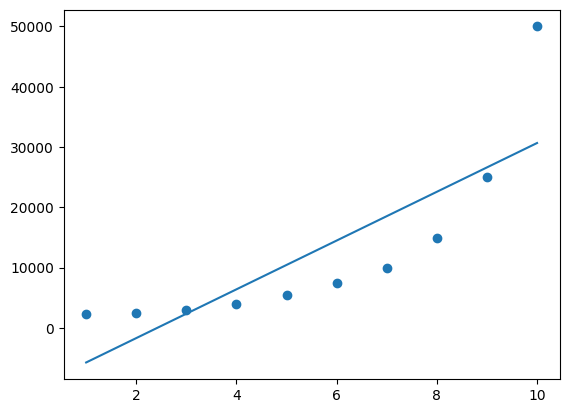

In [71]:
lr = LinearRegression()
lr.fit(x, y)
plt.scatter(x, y)
plt.plot(x, lr.predict(x))

In [72]:
polyr = PolynomialFeatures(degree=2)
x_poly = polyr.fit_transform(x)
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

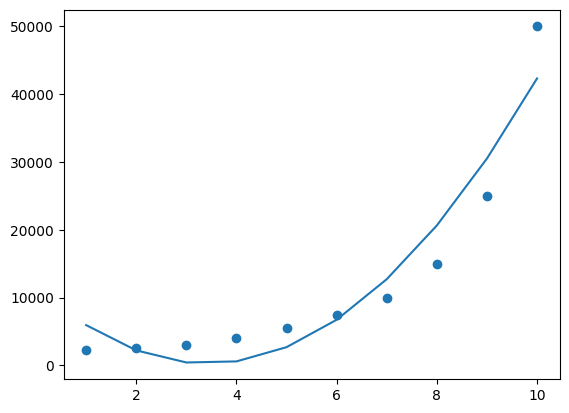

In [73]:
lr2 = LinearRegression()
lr2.fit(x_poly, y)
plt.scatter(x, y)
plt.plot(x, lr2.predict(x_poly))

## Example

```python
import numpy as np
import matplotlib.pyplot as plt

# Veri seti
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.7, 7.4, 20.8, 54.6, 148.4])

# Logaritma dönüşümü (üstel model için)
x_log = np.log(x)

# Polinom regresyonu için, x_log'u 1. dereceden polinom terimleri oluştururuz.
# Burada x_log ve 1 sabiti terimlerini kullanarak model kuruyoruz.
X = np.vstack([np.ones(len(x_log)), x_log]).T

# Lineer regresyon: Y = X * β
# Burada β (beta) katsayılarını buluyoruz
# β = (X^T * X)^-1 * X^T * Y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Tahmin yapma
y_pred = X @ beta

# Grafik oluşturma
plt.scatter(x, y, color='blue', label='Gerçek Veri')
plt.plot(x, y_pred, color='red', label='Üssel Regresyon Fit')
plt.xscale('linear')  # X eksenini lineer ölçekle
plt.yscale('linear')  # Y eksenini lineer ölçekle
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Üssel Regresyon')
plt.legend()
plt.show()

print(f'β0 (sabit): {beta[0]}')
print(f'β1 (log(x) katsayısı): {beta[1]}')

```


In [74]:
lr2.predict(polyr.fit_transform([[11]]))

array([[56091.66666667]])